# COGS 108 - Final Project

## Permissions

- [X] YES - make available
- [ ] NO - keep private

## Overview

## Names

- Gaurika Duvur
- Anjali Ramesh
- Apurwa Shukla
- Vicky Vo

## Group Members IDs

- A14461573
- A15524912
- A14024123
- A13950829

## Research Question

What industry can we predict will have an increase in female workers based on the following factors: females in management/administrative positions, income gap between males and females, and maternity leave policies?

## Background and Prior Work

  This topic is of interest to our group because, as female students preparing to enter the workforce, particularly in male dominated STEM fields, we have noticed the increased attention on the disparity between male and female workers throughout industries, and factors that contribute to this gap. Since there are certain states that are better than others when it comes to wage disparity and earnings, there must also be certain industries that are more beneficial for women (3). We wanted to learn more about the components that affect a woman’s success in a specific field in order to be able to predict the industries that are the most profitable for women today. 

   There has been research done on different aspects of female employment, such as income, paid and unpaid leave, socioeconomic status, and education. With regards to COGS 108 in particular, there is a project focusing on the effect of maternity leave on female involvement in the workforce, which takes into consideration aspects of our research question (1). The results of this project conclude that there was a stronger effect of maternity leave on female participation in the workforce than participation on maternity leave. Another project describes policies surrounding acceptance rates of women in STEM careers and whether or not these policies are fair (2). This project shows that there is not much of an inequality between hiring rates of men and women in STEM fields, and that the proportion of men and women working in these fields is fairly equal. Both these projects use data that could be useful to answering our research question. 
    
    
References (include links):
1. https://github.com/COGS108/FinalProjects-Wi20/blob/master/FinalProject_group069.ipynb
2. https://github.com/COGS108/FinalProjects-Wi20/blob/master/FinalProject_group093.ipynb

## Hypothesis

## Datasets


The ideal dataset would include the proportion of the labor force in that occupation that are women, their average income in that industry (as well as how that income differs between male and female workers), and the average number of weeks of paid maternity leave offered in that industry.


### Dataset 1

Name: Proportion of women in managerial positions

Link: https://genderstats.un.org/#/downloads

Configuration: Indicator name, Country Code, Region, Year, Sex, Age, Location, Occupation, Value, Lower Bound, Upper Bound, Unit, Nature Data, Origin Data, Footnote 1, Footnote 2 (this data must be cleaned appropriately before use)

Number of observations: 1908

Description: The United Nations provides data on the percentage of women in senior and middle management positions in various countries around the world. (For the purposes of this analysis, we will be focusing on the United States.)


### Dataset 2

Name: Proportion of women in senior and middle management positions

Link: https://genderstats.un.org/#/downloads

Configuration: Indicator name, Country Code, Region, Year, Sex, Age, Location, Occupation, Value, Lower Bound, Upper Bound, Unit, Nature Data, Origin Data, Footnote 1, Footnote 2 (this data must be cleaned appropriately before use)

Number of observations: 427

Description: The United Nations provides data on the proportion of women in senior and middle management positiosn around the world. (For the purposes of this analysis, we will be focusing on the United States.)

### Dataset 3

Name: 

Link: https://www.kaggle.com/jonavery/notebook?select=inc_occ_gender.csv

Configuration: These are the categories the data is divided into
- Occupation: Job title as given from BLS. Industry summaries are given in ALL CAPS.
- All_workers: Number of workers male and female, in thousands.
- All_weekly: Median weekly income including male and female workers, in USD.
- M_workers: Number of male workers, in thousands.
- M_weekly: Median weekly income for male workers, in USD.
- F_workers: Number of female workers, in thousands.
- F_weekly: Median weekly income for female workers, in USD.

Number of observations: __________

Description: The dataset on US incomes by occupation and gender provides data on median weekly income of male and female in 535 different occupations. This dataset has been retrieved from the bureau of labor statistics.

### Dataset 4

Name: _______

Link: ______

Configuration: _______

Number of observations: 965

Description: _____

## Setup

In [1]:
%matplotlib inline

# Import libraries
import numpy as np
import pandas as pd

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import statsmodels.api as sm
import patsy

## Data Cleaning

### Datasets 1 and 2

In order to clean these datasets, I had to take out all the unneeded columns that contained information that I didn't need to use. Since these datasets are sourced from the United Nations, I had to choose only the data from the United States, since this was the part of the data that we were interested in. I also took out all the null values and empty columns that did not add valuable information to my analysis. 

In [2]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [3]:
df_management = pd.read_csv("managerialpostions.csv")
df_management.head()
df_management_us = df_management[df_management.Country == "United States of America"]

In [4]:
df_senior = pd.read_csv("senior_management_positions.csv")
df_senior_us = df_senior[df_senior.Country == "United States of America"]

In [5]:
df_management_us = df_management_us.drop(columns =["Age", "Location", "Occupation", "LowerBound", "UpperBound", "OriginData", "Footnote1", "Footnote2"]) 
df_management_us.head()

,Indicator Name,Region,Country Code,Country,Year,Sex,Value,Unit,NatureData
792,Proportion of women in managerial positions,Developed regions,840,United States of America,2003,Female,37.5,Percentage,Country data
793,Proportion of women in managerial positions,Developed regions,840,United States of America,2008,Female,38.3,Percentage,Country data
794,Proportion of women in managerial positions,Developed regions,840,United States of America,2000,Female,36.0,Percentage,Country data
795,Proportion of women in managerial positions,Developed regions,840,United States of America,2005,Female,37.8,Percentage,Country data
796,Proportion of women in managerial positions,Developed regions,840,United States of America,2007,Female,38.4,Percentage,Country data


In [6]:
df_senior_us = df_senior_us.drop(columns = ["Age", "Location", "Occupation", "LowerBound", "UpperBound", "OriginData", "Footnote1", "Footnote2", "Footnote3", "Footnote4", "Footnote5", "Footnote6", "Coverage"]) 
df_senior_us.head()

,Indicator Name,Region,Country Code,Country,Year,Sex,Value,Unit,NatureData
588,Proportion of women in senior and middle manag...,Developed regions,840,United States of America,2003,Female,37.3,Percentage,Country data
589,Proportion of women in senior and middle manag...,Developed regions,840,United States of America,2008,Female,37.9,Percentage,Country data
590,Proportion of women in senior and middle manag...,Developed regions,840,United States of America,2000,Female,35.5,Percentage,Country data
591,Proportion of women in senior and middle manag...,Developed regions,840,United States of America,2005,Female,37.5,Percentage,Country data
592,Proportion of women in senior and middle manag...,Developed regions,840,United States of America,2007,Female,38.1,Percentage,Country data


In [7]:
df_manage = pd.concat([df_management_us, df_senior_us], ignore_index=True)
df_manage = df_manage.replace({'Indicator Name': "Proportion of women in senior and middle management positions"}, "Proportion of women in managerial positions")
df_manage = df_manage.sort_values('Year')
df_manage = df_manage.reset_index(drop=True)
df_manage.head()

,Indicator Name,Region,Country Code,Country,Year,Sex,Value,Unit,NatureData
0,Proportion of women in managerial positions,Developed regions,840,United States of America,2000,Female,36.0,Percentage,Country data
1,Proportion of women in managerial positions,Developed regions,840,United States of America,2000,Female,35.5,Percentage,Country data
2,Proportion of women in managerial positions,Developed regions,840,United States of America,2001,Female,35.9,Percentage,Country data
3,Proportion of women in managerial positions,Developed regions,840,United States of America,2001,Female,36.4,Percentage,Country data
4,Proportion of women in managerial positions,Developed regions,840,United States of America,2002,Female,36.4,Percentage,Country data


## Data Analysis & Results

### Datasets 1 and 2

In [8]:
df_manage.describe()

,Country Code,Year,Value
count,36.0,36.000000,36.000000
mean,840.0,2008.500000,38.147222
std,0.0,5.261722,1.262534
min,840.0,2000.000000,35.500000
25%,840.0,2004.000000,37.300000
50%,840.0,2008.500000,38.300000
75%,840.0,2013.000000,39.025000
max,840.0,2017.000000,40.500000


This chart shows the basic description of the proportion of women in management positions over the course of 17 years. We can ignore the "Country Code" and "Year" column, as those are not the variables that we want to describe. When we look at the statistical description of the column "Value", we can see that the smallest proportion of women was 35.5% in the year 2000, and that this percentage has increased to 40.5% in the year 2017. 

Text(0.5, 1.0, 'Proportion of Women in Management Positions from 2000 to 2017')

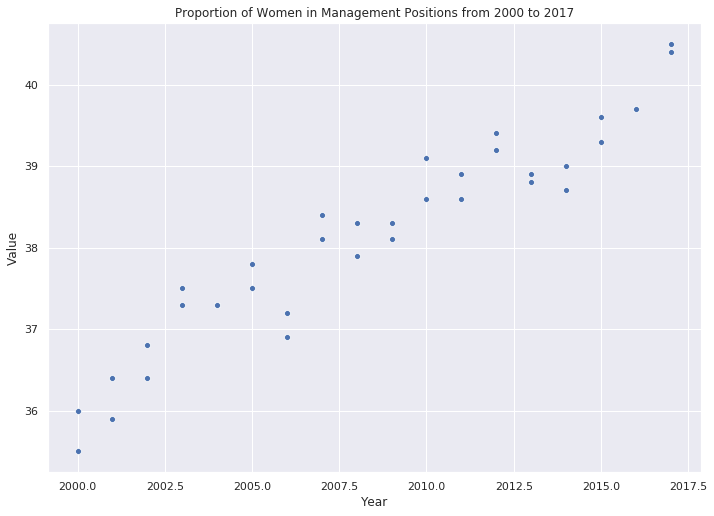

In [9]:
ax = sns.scatterplot(x="Year", y="Value", data=df_manage)
ax.set_title("Proportion of Women in Management Positions from 2000 to 2017")

From this inital scatterplot created by plotting the proportion of women in management positions versus the year of the observation, we can already tell that there is a strong positive relationship between these two variables. 

However, to be sure of this, we can go on to perform a linear regression analysis to find out the strength of this relationship.

The type of linear regression that we will be performing is an Ordinary Least Squares analysis, which means that we are fitting a regression line that would minimize the square of distance from the regression line.

In [10]:
# X, or the year, is the independent variable, and Y, or the value/proportion of women, is the dependent value.
X = df_manage["Year"]
y = df_manage["Value"]

# this carries out the Ordinary Least Squares analysis
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
p = model.params
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 3.844e+04
Date:                Thu, 11 Jun 2020   Prob (F-statistic):           8.08e-55
Time:                        23:31:46   Log-Likelihood:                -56.149
No. Observations:                  36   AIC:                             114.3
Df Residuals:                      35   BIC:                             115.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Year           0.0190   9.69e-05    196.066      0.000       0.019       0.019
==============================================================================
Omnibus:                        0.829   Durbin-Watson:                   0.145
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.879
Skew:                          -0.241   Prob(JB):                        0.644
Kurtosis:                       2.406   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This table shows the coefficient of this regression to be 0.0190. This means that as the Year variable increases by 1, there will be a 0.0190 increase in the proportion of women in management positions. We can interpret this to mean that the proportion of women in management positions increases by around 1.9% each year. This trend has held steady from the year 2000.

Based on this output, we can see that the R-squared value is 0.999, meaning that this model explains 99.9% of the variance in the proportion of women in management positions.

#### Visualizing Linear Regression

In [11]:
df = pd.DataFrame(df_manage, columns=['Year', 'Value'])

#Check correlation between Year and Value
df.corr()


,Year,Value
Year,1.000000,0.955019
Value,0.955019,1.000000


Text(0.5, 0.98, 'Linear Regression for Proportion of Women in Management Over Time')

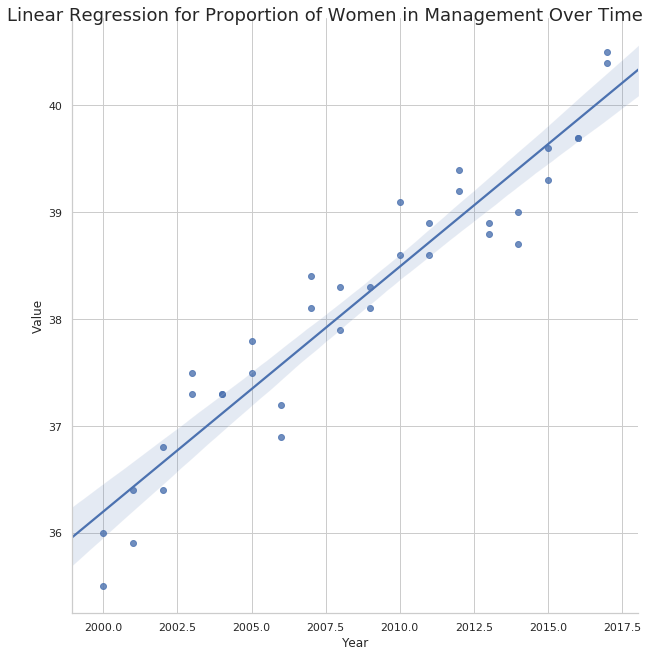

In [19]:
sns.set_style('whitegrid') 
lm = sns.lmplot(x='Year', y='Value', data=df_manage)
lm.fig.set_size_inches(10,10)
g = lm.fig
g.suptitle("Linear Regression for Proportion of Women in Management Over Time", fontsize = 18)

In [20]:
type(predictions)

pandas.core.series.Series

In [21]:
print(predictions.to_string())

0     37.988587
1     37.988587
2     38.007581
3     38.007581
4     38.026576
5     38.026576
6     38.045570
7     38.045570
8     38.064564
9     38.064564
10    38.083559
11    38.083559
12    38.102553
13    38.102553
14    38.121547
15    38.121547
16    38.140542
17    38.140542
18    38.159536
19    38.159536
20    38.178530
21    38.178530
22    38.197524
23    38.197524
24    38.216519
25    38.216519
26    38.235513
27    38.235513
28    38.254507
29    38.254507
30    38.273502
31    38.273502
32    38.292496
33    38.292496
34    38.311490
35    38.311490


This list of predictions shows the predicted proportion of women in management in the coming years. This is based on the model that we fitted using the Ordinary Least Squares analysis, and shows the results for up to the next 35 years.

For example, one way to interpret these predictions would be to say that in 5 years from 2017, or in 2022, the predicted percentage of women in senior and middle management positions would be around 38.03%. This shows the gradual increase in the proportion of women with the passing of time.

However, there are some confounding factors that might have contributed to a skewed analaysis of these two variables. This could have been bias in the women that were observed, they might have all been chosen from the same industry, which could have been one that had a higher or lower than average proportion of women in management. Also, the definition of "management positions" could have too specific to generalize over an entire workforce of women, or maybe too general.

With these preliminary results, I conclude that there has been a steady increase in the proportion of women in the workforce over the last 20 or so years, but there is still a long way to go before women make up 50% of people in management positions.

## Ethics and Privacy

The data that we used was either public and/or licensed, so we had the right to access it. Also, the identity of the participants was not disclosed. If this was an issue in our data, it would have violated the basic confidentiality of the participants, and also violated the basic rules of ethics in data science. We did this using the Safe Harbour Method, which requires that specific identifiers such as telephone numbers, vehicle identifiers, and email addresses are removed from the data. This was somewhat simple to do, since the websites we got our data from were already available for public use. 


We do acknowledge that there might have been some bias in the maternity leave data from FairyGodBoss,  since it is crowdsourced data and may be inaccurate. There may have also been racial bias within the data that we were not able to detect due to the identities being unknown. Since adding race as a factor might somewhat skew the dataset or show evidence of a confounding variable, we chose to forego this as a variable. The factors we have chosen to identify an ideal work industry were subjective and might not be what others would have considered ideal factors. We acknowledge these biases and keep them in mind before concluding generalizations. 


## Conclusion and Discussion

## Team Contributions